In [57]:
import numpy as np
import pandas as pd
from scipy.constants import h,k,c,Wien,sigma, Avogadro
from astroquery.vizier import Vizier

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=18)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (14, 10)

In [58]:
#integral from a to b points in Trapezoid Rule for photons
#For this version, you need the input of wavelength in microns, flux in W/m^2/um
def trap_rule_data_defintgral_photons(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x and f needs to be in meters
    e = (h*c)/(x) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f)/e #converting per micron to per meter then divide by photon energy
    x_m = (x) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [59]:
def trap_rule_data_defintgral(x, f, a, b): #for definite integral from (a,b) in trapezoidal rule
    #check bounday limits, make an if statement to check endpoints
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x[i+1] - x[i] #for ever index there is a delta x in value
        sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html

The fields in the table Direct and Global 37 Deg Tilt: 
* ASTM G-173 are wavelength in nanometers (nm), data - 'wavelength'
* the (Gueymard 2002) extraterrestrial spectral irradiance, data - 'Etr'
* direct normal spectral Irradiance (W/sm/nm), data - 'Direct+circumsolar'
* the global total spectral irradiance (W/sm/nm) on the 37° sun-facing tilted surface for the atmospheric conditions specified above, data - 'Global tilt'

To convert nanometers to μm, divide by 1000. To convert W/sm/nm to W/sm/μm, multiply by 1000.

To convert meters to μm, divide by 1e9. To convert W/sm/nm to W/sm/μm, multiply by 1e9.

In [60]:
#Surface Irradiance value
cols1=['wavelength', 'Etr', 'Global tilt', 'Direct+circumsolar']
#Etr is TOA, Global Tilt, Direct+Circumsolar
astmg173_data = np.genfromtxt('data/astmg173.txt', skip_header=2, names=cols1)
astmg173_data #wavelength in nm and solar irradiance is W/m2/nm

array([( 280. , 0.082  , 4.7309e-23, 2.5361e-26),
       ( 280.5, 0.099  , 1.2307e-21, 1.0917e-24),
       ( 281. , 0.15   , 5.6895e-21, 6.1253e-24), ...,
       (3990. , 0.00878, 7.3723e-03, 7.3894e-03),
       (3995. , 0.0087 , 7.2100e-03, 7.2263e-03),
       (4000. , 0.00868, 7.1043e-03, 7.1199e-03)],
      dtype=[('wavelength', '<f8'), ('Etr', '<f8'), ('Global_tilt', '<f8'), ('Directcircumsolar', '<f8')])

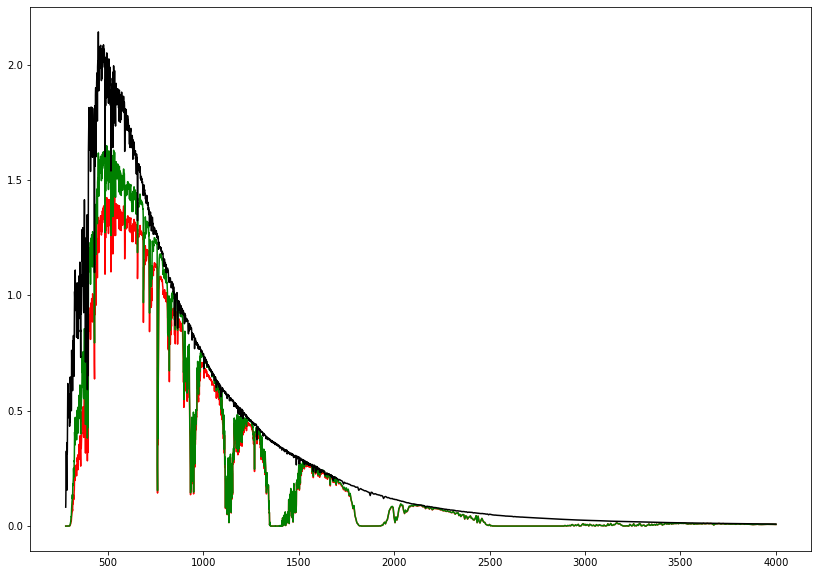

In [61]:
plt.plot(astmg173_data['wavelength'], astmg173_data['Directcircumsolar'], c='red')
plt.plot(astmg173_data['wavelength'], astmg173_data['Global_tilt'], c='green')
plt.plot(astmg173_data['wavelength'], astmg173_data['Etr'], c='black')

In [62]:
#wavelength is in nm, needs to be meters
astmg173_wav_m = (astmg173_data['wavelength']*1e-9)
astmg173_irrad_m = astmg173_data['Directcircumsolar']/1e-9
astmg173_irrad_m #last index is 249

array([2.5361e-17, 1.0917e-15, 6.1253e-15, ..., 7.3894e+06, 7.2263e+06,
       7.1199e+06])

In [63]:
astmg173_irrad_m[2001]

7119900.0

In [64]:
#full wavelength for photons of Solar Flux
y = []
y = astmg173_irrad_m
x = []
x = astmg173_wav_m
a, b = astmg173_wav_m[0], astmg173_wav_m[-1]
sol_surface_direct = trap_rule_data_defintgral_photons(x, y, a, b, h, c)
sol_surface_direct

3.9878037751859354e+21

In [65]:
(np.absolute(sol_surface_direct-(4.0e21)))/(4.0e21)*100

0.30490562035161495

In [66]:
d, e = 400e-9, 700e-9
sol_photonflux_astmg173_PAR = trap_rule_data_defintgral_photons(x, y, d, e, h, c)
sol_photonflux_astmg173_PAR                                                              

1.0449616049839182e+21

In [67]:
(np.absolute(sol_photonflux_astmg173_PAR-(1.05e21)))/(1.05e21)*100

0.4798471443887461

In [68]:
sol_photonflux_astmg173_PAR_ext = trap_rule_data_defintgral_photons(x, y, d, 750e-9, h, c)
sol_photonflux_astmg173_PAR_ext  

1.244428725355724e+21

In [69]:
sol_photonflux_astmg173_PAR_ext/sol_photonflux_astmg173_PAR

1.1908846405652154

In [12]:
def photons_to_micromol(x, A):
    y = x*(1/A)*(1e6)
    return y #micromol m^[-2] s^[-1]

In [13]:
Avogadro

6.02214076e+23

In [14]:
Earth_surface_micromol = photons_to_micromol(sol_photonflux_astmg173_PAR, Avogadro) 
Earth_surface_micromol

1735.1995687724811

In [15]:
def trap_rule_data_defintgral_micromoles(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f)/(Avogadro*e) #converting per micron to per meter then divide by photon energy and Avogadro's constant
    x_m = (x) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum*(1e6) #mols to micromols - > outpot is micromols m-2 s-1

In [16]:
solflux_surface_micrmol = trap_rule_data_defintgral_micromoles(x, y, a, b, h, c)
solflux_surface_micrmol

6621.9039609196

In [17]:
solflux_surface_micrmol_PAR = trap_rule_data_defintgral_micromoles(x, y, d, e, h, c)
solflux_surface_micrmol_PAR

1735.1995687724823

Based on ASTM data on the surface at 1.5 air mass, the amounts of photons are 1735.20 $\mu$mol m$^{-2}$ s$^{-1}$ in PAR.

Extension in upper limit of PAR at 750 nm.

In [18]:
sol_photonflux_astmg173_PAR_ext = trap_rule_data_defintgral_photons(x, y, d, 750e-9, h, c)
sol_photonflux_astmg173_PAR_ext

1.244428725355724e+21

In [19]:
solflux_surface_micrmol_PAR_ext = trap_rule_data_defintgral_micromoles(x, y, d, 750e-9, h, c)
solflux_surface_micrmol_PAR_ext

2066.4225147665347

## Top-of-Atmosphere (TOA)

In [20]:
cols=['Wavelength', 'Wavenumber', 'Solar Flux incident at top of atmosphere', 'Planetary Flux', 'Albedo']
sol_data = np.genfromtxt('data/earth_quadrature_radiance_refl.flx', skip_header=8, names=cols)
sol_data #wavelength units in um (microns), flux at TOA units in w/m2/um

array([(0.100179, 99821.32 , 0.807243, 0.      , 0.       ),
       (0.10018 , 99820.32 , 0.807223, 0.      , 0.       ),
       (0.100181, 99819.33 , 0.807203, 0.      , 0.       ), ...,
       (4.99501 ,  2001.998, 3.59416 , 3.155102, 0.8778411),
       (4.9975  ,  2001.001, 3.58955 , 3.16927 , 0.8829157),
       (5.      ,  2000.   , 3.56088 , 3.164086, 0.8885687)],
      dtype=[('Wavelength', '<f8'), ('Wavenumber', '<f8'), ('Solar_Flux_incident_at_top_of_atmosphere', '<f8'), ('Planetary_Flux', '<f8'), ('Albedo', '<f8')])

In [21]:
sol_data['Solar_Flux_incident_at_top_of_atmosphere']/1e-6

array([ 807243.,  807223.,  807203., ..., 3594160., 3589550., 3560880.])

In [22]:
sol_data['Wavelength']*1e-6

array([1.00179e-07, 1.00180e-07, 1.00181e-07, ..., 4.99501e-06,
       4.99750e-06, 5.00000e-06])

In [23]:
sol_data_flux = sol_data['Solar_Flux_incident_at_top_of_atmosphere']/1e-6
sol_data_wav = sol_data['Wavelength']*1e-6

In [24]:
#test in full wavelength for photons of Solar Flux
n = []
n = sol_data_flux #W/m2/um
m = []
m = sol_data_wav #um
o, p = sol_data_wav[0], sol_data_wav[-1]
sol_TOA_photons = trap_rule_data_defintgral_photons(m, n, o, p, h, c)
sol_TOA_photons

6.318968046620857e+21

In [25]:

sol_TOA_photons_PAR = trap_rule_data_defintgral_photons(m, n, d, e, h, c)
sol_TOA_photons_PAR

1.4558190736255248e+21

In [26]:
Earth_TOA_micromol_PAR = photons_to_micromol(sol_TOA_photons_PAR, Avogadro) 
Earth_TOA_micromol_PAR

2417.4444464920225

In [27]:
solflux_TOA_micrmol_PAR = trap_rule_data_defintgral_micromoles(m, n, d, e, h, c)
solflux_TOA_micrmol_PAR

2417.444446492031

In [28]:
(solflux_surface_micrmol_PAR)/(solflux_TOA_micrmol_PAR)

0.7177826035632138

In [29]:
sol_TOA_photons_PAR_ext = trap_rule_data_defintgral_photons(m, n, d, 750e-9, h, c)
sol_TOA_photons_PAR_ext

1.6998547840021394e+21

In [30]:
solflux_TOA_micrmol_PAR_ext = trap_rule_data_defintgral_micromoles(m, n, d, 750e-9, h, c)
solflux_TOA_micrmol_PAR_ext

2822.6752773579183

In [31]:
(solflux_surface_micrmol_PAR_ext)/(solflux_TOA_micrmol_PAR_ext)

0.7320794323535325

Compared to the 2417.44 $\mu$mol m$^{-2}$ s$^{-1}$ in PAR at TOA, about only 72% of PAR photons reach the surface.

In the extension to 750 nm, 2822.68 $\mu$mol m$^{-2}$ s$^{-1}$ in PAR at TOA and about only 73% of PAR photons reach the surface.

Based on the information from Raven, Kubler, Beardall 2000, Wolstencroft & Raven 2002, Raven & Cockell 2006, photon flux density
(PFD) in the 400-700 nm spectral region (PAR) at the surface at midday of 200-2000 $\mu$mol photon m-2 s-1.

https://bionumbers.hms.harvard.edu/bionumber.aspx?s=n&v=3&id=100324

Flux of photons
Value	4E+21 Photons/m^2/sec

Method	Intergration of the standard reference solar spectral irradiance at Air Mass 1.5 (ASTM G-173-03) (ASTM international, ASTM G173-03, Standard Tables for Reference Solar Spectral Irradiances: Direct Normal and Hemispherical on 37° Tilted Surface, https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html)
Comments	At sea level, based on reference solar irradiance 1.5 air masses, integrated over the whole spectrum.

Using the global total spectral irradiance (W/sm/nm) on the 37° sun-facing tilted surface for the atmospheric conditions specified above. 'Global tilt' - in data.

In [32]:
sol_surface_Tilt = astmg173_data['Global_tilt']/1e-9
#full wavelength for photons of Solar Flux
y_t = []
y_t = sol_surface_Tilt
sol_photonflux_tilt = trap_rule_data_defintgral_photons(x, y_t, a, b, h, c)
sol_photonflux_tilt

4.3055712927810595e+21

In [33]:
(np.absolute(sol_photonflux_tilt-(4.0e21)))/(4.0e21)*100

7.639282319526488

In [34]:
sol_surface_av1 = (astmg173_irrad_m + sol_surface_Tilt)/2
sol_surface_av1

array([2.36671805e-14, 6.15895850e-13, 2.84781265e-12, ...,
       7.38085000e+06, 7.21815000e+06, 7.11210000e+06])

In [35]:

y_av1 = []
y_av1 = sol_surface_av1
sol_photonflux_av1 = trap_rule_data_defintgral_photons(x, y_av1, a, b, h, c)
sol_photonflux_av1

4.1466875339834943e+21

In [36]:
(np.absolute(sol_photonflux_av1-(4.0e21)))/(4.0e21)*100

3.667188349587357

Graph of Surface vs TOA

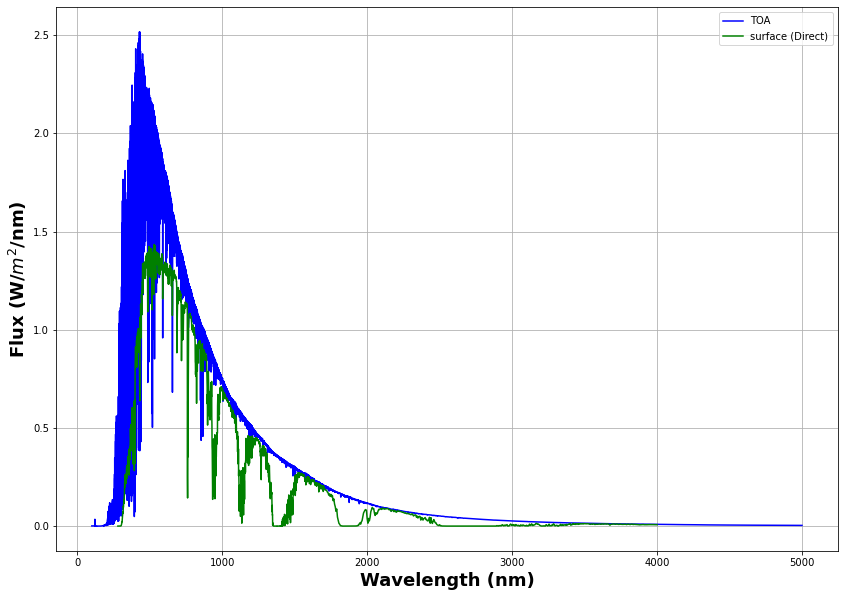

In [37]:
plt.plot(sol_data['Wavelength']*1e3, sol_data['Solar_Flux_incident_at_top_of_atmosphere']/1e3, c='blue', label='TOA')
plt.plot(astmg173_data['wavelength'], astmg173_data['Directcircumsolar'], c='green', label='surface (Direct)')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (W/$m^{2}$/nm)')
plt.grid();

## TRAPPIST-1e

In [38]:
#For this version, you need the input of wavelength in microns, flux in W/m^2/um
def trap_rule_data_defintgral_photons_um(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x*1e-6) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f/1e-6)/e #converting per micron to per meter then divide by photon energy
    x_m = (x*1e-6) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [39]:
#TRAP_data = np.genfromtxt('trappist1_sed.txt', delimiter='	') 
TRAP_data1 = np.genfromtxt('data/trappist1_sed_original.txt', 
                           skip_header=18, names='Wavelength, Flux')
TRAP_data1 #wavelength in um and flux at 1 AU is W/m2/um

array([(1.20000e-01, 1.02252e-04), (1.20002e-01, 2.11857e-04),
       (1.20003e-01, 3.58135e-04), ..., (1.92308e+02, 1.47285e-08),
       (1.96078e+02, 1.36311e-08), (2.00000e+02, 1.25961e-08)],
      dtype=[('Wavelength', '<f8'), ('Flux', '<f8')])

In [40]:
#Agol et al. 2021 distance. S = 1/r^2
flux_TRAP1e1 = (TRAP_data1['Flux'])/((0.02925)**2)
flux_TRAP1e1

array([1.19514355e-01, 2.47623055e-01, 4.18595953e-01, ...,
       1.72149901e-05, 1.59323252e-05, 1.47225948e-05])

In [41]:
#TRAPPIST-1 e in full wavelength, energy
g = []
g = TRAP_data1['Wavelength']
y = []
y = flux_TRAP1e1
i, j = TRAP_data1['Wavelength'][0], 5.0
trap_rule_data_defintgral_photons_um(g, y, i, j, h, c)

6.951154085431671e+21

In [42]:
h

6.62607015e-34

In [43]:
c

299792458.0

In [44]:
d_m, e_m = 0.4, 0.7
TRAP1_TOA_photons_PAR = trap_rule_data_defintgral_photons_um(g, y, d_m, e_m, h, c)
TRAP1_TOA_photons_PAR

1.3235421301108275e+19

In [45]:
TRAP1_TOA_micromol_PAR = photons_to_micromol(TRAP1_TOA_photons_PAR, Avogadro) 
TRAP1_TOA_micromol_PAR

21.977934140995195

In [46]:
TRAP1_TOA_micrmol_PAR = trap_rule_data_defintgral_micromoles(g, y, d_m, e_m, h, c)
TRAP1_TOA_micrmol_PAR/1e6

21.977934140995036

In [47]:
TRAP1_surface_micrmol_PAR = (TRAP1_TOA_micrmol_PAR/1e6)*((solflux_surface_micrmol_PAR)/(solflux_TOA_micrmol_PAR))
TRAP1_surface_micrmol_PAR 

15.775378788664261

In [48]:
solflux_TOA_micrmol_PAR

2417.444446492031

In [49]:
solflux_surface_micrmol_PAR

1735.1995687724823

TRAPPIST-1e receives 21.978 $\mu$mol m$^{-2}$ s$^{-1}$ in PAR at TOA, while if the surface has an air mass of 1.5 and an atmospheric composition similar to Earth then 15.775 $\mu$mol m$^{-2}$ s$^{-1}$ in PAR are recieved. A crude approximation.

Extension in PAR at upper limit of 750 nm.

In [50]:
TRAP1_TOA_photons_PAR_ext = trap_rule_data_defintgral_photons_um(g, y, d_m, 0.75, h, c)
TRAP1_TOA_photons_PAR_ext

3.327068423090349e+19

In [51]:
TRAP1_TOA_micrmol_PAR_ext = trap_rule_data_defintgral_micromoles(g, y, d_m, 0.75, h, c)
TRAP1_TOA_micrmol_PAR_ext/1e6

55.247270957020056

In [52]:
#solflux_surface_micrmol_PAR_ext is the extended PAR of surface of Earth at 1.5 airmass
#solflux_TOA_micrmol_PAR_ext is the extended PAR of TOA of Earth
#TRAP1_TOA_micrmol_PAR_ext is extended PAR of TOA of TRAPPIST-1e
TRAP1_surface_micrmol_PAR_ext = (TRAP1_TOA_micrmol_PAR_ext/1e6)*((solflux_surface_micrmol_PAR_ext)/(solflux_TOA_micrmol_PAR_ext))
TRAP1_surface_micrmol_PAR_ext #TRAPPIST-1e at the surface of air mass 1.5

40.44539076129704

In [53]:
TRAP1_surface_micrmol_PAR_ext/TRAP1_surface_micrmol_PAR

2.563830086308923

In [54]:
TRAP1_surface_micrmol_PAR_ext/2.168999460965603

18.64702665407368

## For Surface in extension. 